In [24]:
# Copyright 2023 YASSIN KORTAM

# Permission is hereby granted, free of charge, to any person obtaining a copy of 
# this software and associated documentation files (the “Software”), to deal in the 
# Software without restriction, including without limitation the rights to use, copy,
# modify, merge, publish, distribute, sublicense, and/or sell copies of the Software,
# and to permit persons to whom the Software is furnished to do so.

# THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, 
# EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF 
# MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. 
# IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, 
# DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, 
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt
import random
import pandas as pd
from datetime import datetime

#Constants
signal_size = 20 #Size of the signal in the demo

# Abstract
The DTFT of any signal can be written as the summation of complex exponentials.

- Given that the DTFT of an impulse is 1.

- Given time shifting property of DTFT

- Given linearity property of DTFT



In [25]:
#The Yassin Fourier Transform (function of frequency) O(n)
def yassinft(x, omega):

    #Execute time shifting property on all the coeffecients
    #Using numexpr library to save time

    #Generate the exponents in a time effecient way
    j = 1j
    k = np.arange(0, x.size, 1) 
    powers = ne.evaluate('-1*omega*k')
    re = ne.evaluate('x*cos(powers)')
    im = ne.evaluate('j*x*sin(powers)')
    w_matrix = ne.evaluate('re + im')

    #Dot product of the yassinft matrix with all ones matrix
    return ne.evaluate('sum(w_matrix)')

#Evaluate Yassin Fourier Transform O(n^2)
def yft(x):
    omegas = np.arange(0, 2*np.pi, 2*np.pi/x.size)
    return np.array([yassinft(x, omega) for omega in omegas])

# Demo

- The FFT and YassinFT are operated on a signal of randomly generated integers.

- The outputs are plotted together.


[112.        +0.00000000e+00j  12.26033839+2.81458276e+00j
   8.28115295-1.59184233e+00j   0.70327084-1.52979265e+01j
 -16.45491503-6.65739561e+00j   6.        -1.40000000e+01j
  -1.78115295+1.01841071e+01j  10.76886511+9.15202842e+00j
 -22.04508497-4.11449677e+00j  -9.73247435+1.00395192e+01j
  12.        +1.23726466e-14j  -9.73247435-1.00395192e+01j
 -22.04508497+4.11449677e+00j  10.76886511-9.15202842e+00j
  -1.78115295-1.01841071e+01j   6.        +1.40000000e+01j
 -16.45491503+6.65739561e+00j   0.70327084+1.52979265e+01j
   8.28115295+1.59184233e+00j  12.26033839-2.81458276e+00j]


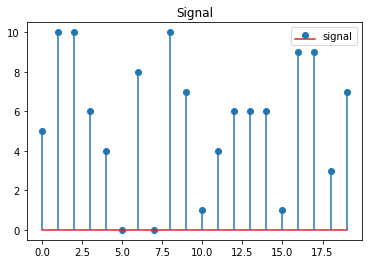

/Users/yassinkortam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/yassinkortam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


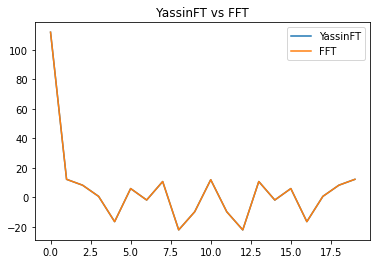

In [26]:
#Example signal
n = np.arange(0, signal_size, 1)
x = np.array([random.randint(0,10) for x in n])

#Evaluate the yassinft 
ft = yft(x) 
print(ft)

#Evaluate fft
ft2 = np.fft.fft(x)

#Plot the signal, yassinft, and normal fft
plt.figure()
plt.title("Signal")
plt.stem(n, x, label="signal")
plt.legend()
plt.show()

plt.figure()
plt.title("YassinFT vs FFT")
plt.plot(ft, label="YassinFT")
plt.plot(ft2, label="FFT")
plt.legend()
plt.show()

# Performance Comparison
In theory, the YassinFT has O(n^2) time complexity while FFT has O(nlog(n)) time complexity. A simple test is conducted to demonstrate this hypothesis

    Size  YassinFT Time  FFT Time  YassinFT:FFT
0  100.0       0.009809  0.000037    265.108108
1  200.0       0.013380  0.000037    361.621622
2  300.0       0.021216  0.000048    442.000000
3  400.0       0.029294  0.000035    836.971429
4  500.0       0.036661  0.000035   1047.457143
5  600.0       0.045521  0.000037   1230.297297
6  700.0       0.053768  0.000032   1680.250000
7  800.0       0.063499  0.000030   2116.633333
8  900.0       0.074142  0.000042   1765.285714


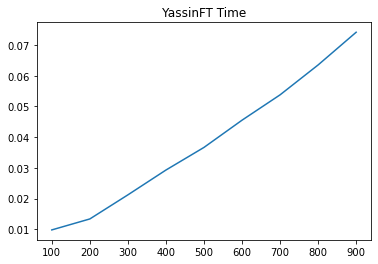

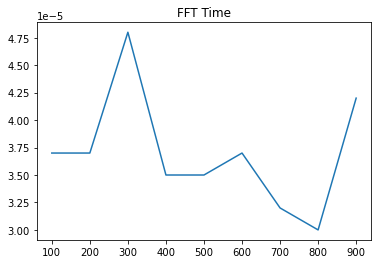

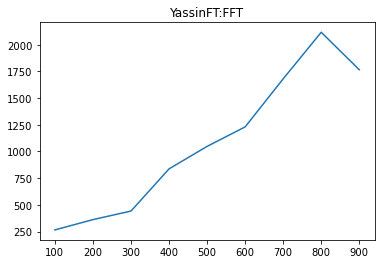

In [27]:
logs = {'Size':[],'YassinFT Time':[], 'FFT Time':[], 'YassinFT:FFT':[]}
for i in np.arange(1E2, 1E3, 1E2):

    #Generate signal
    x = np.random.randint(100,size=int(i))

    #YassinFT
    start = datetime.now()
    ft = yft(x)
    end = datetime.now()
    yassinFTTime = end - start

    #FFT
    start = datetime.now()
    ft2 = np.fft.fft(x)
    end = datetime.now()
    fftTime = end - start

    logs['Size'].append(i)
    logs['YassinFT Time'].append(yassinFTTime.total_seconds())
    logs['FFT Time'].append(fftTime.total_seconds())
    logs['YassinFT:FFT'].append(yassinFTTime.total_seconds()/fftTime.total_seconds())

logs = pd.DataFrame(logs)
print(logs)

plt.figure()
plt.title("YassinFT Time")
plt.plot(logs['Size'], logs['YassinFT Time'])

plt.figure()
plt.title("FFT Time")
plt.plot(logs['Size'], logs['FFT Time'])

plt.figure()
plt.title("YassinFT:FFT")
plt.plot(logs['Size'], logs['YassinFT:FFT'])

# Conclusion
The YassinFT scales at about O(n^2) while FFT scales at about O(nlog(n)). YassinFT is significantly slower than the FFT when operated on large datasets but can be a helpful tool when considering very small datasets.